<a href="https://colab.research.google.com/github/nedokormysh/Stepik_AI_Education_Linear_algorithms/blob/week_4/Bootcamp_LinearModels_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Градиентный спуск

Сгенерируем выборку для задачи регрессии и визуализируем данные

(100,)
(100, 1)


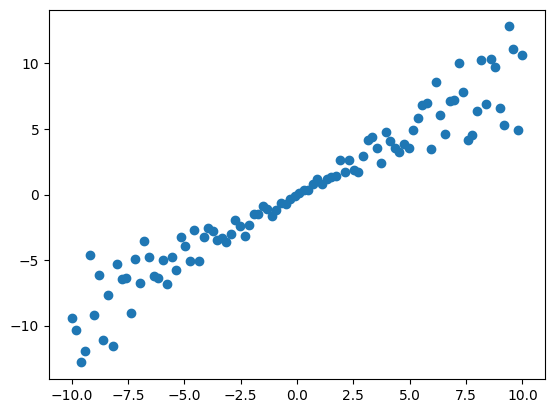

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

X = np.linspace(-10,10,100)

print(X.shape)

y = X * (np.random.random_sample(len(X)) + 0.5)
X = X.reshape(len(X), 1)

print(X.shape)

plt.scatter(X, y)

Реализуем метод градиентного спуска для обучения линейной регрессии.

Сначала напишем функцию для вычисления среднеквадратичной ошибки

$MSE = \frac{1}{m}||Xw - y||^2_2$.

Здесь квадратичная ошибка записана в матричном виде, т.е. $X$ - матрица объект-признак, $w$ - вектор весов модели.
*  $Xw$ - вектор предсказания модели
*  $y$ - вектор правильных ответов,
и квадратичная ошибка - это квадрат нормы разности вектора предсказания и вектора правильных ответов.

Вычислить норму вектора в python можно разными способами. Здесь мы  воспользуемся готовой функцией из библиотеку numpy - numpy.linalg.norm.

In [ ]:
import numpy as np

def compute_cost(X, y, theta):
    m = len(y)

    cost = (1./m) * (np.linalg.norm(X @ theta - y) ** 2)
    return cost

Реализуем градиентный спуск по формуле

$$w_{new} = w_{prev} - \nabla_w Q(w_{prev})$$

Вычислим градиент MSE:
$$\nabla_w Q(w)=\frac2m X^T(Xw-y).$$

Итак, реализуем метод градиентного спуска:

*  первым шагом добавим к матрице $X$ единичный столбец - это константный признак, равный 1 на всех объектах. Он нужен, чтобы записать предсказание линейной регрессии в виде скалярного произведения и тем самым избавиться от знака суммы:
$a(x)=w_0+w_1x_1+...+w_dx_d=w_1\cdot 1+w_1x_1+...w_dx_d=(w,x)$

В python скалярное произведение можно записать так: $w@x$

*  затем инициализируем случайным образом вектор весов params

*  зададим пустой массив cost_track, в который будем записывать ошибку на каждой итерации

*  наконец, в цикле по количеству эпох (итераций) будем обновлять веса по формуле градиентного спуска

In [ ]:
def gradient_descent(X, y, learning_rate, iterations):

    X = np.hstack((np.ones((X.shape[0], 1)), X)) # добавляем константный признак (столбец из 1)

    params = np.random.rand(X.shape[1]) # инициализируем веса

    m = X.shape[0] # число объектов

    cost_track = np.zeros((iterations,1)) # массив с ошибками (MSE)

    for i in range(iterations):
        params = params - 2./m * learning_rate * (X.T @ ((X @ params) - y))

        cost_track[i] = compute_cost(X, y, params)

    return cost_track, params

Создадим функцию для получения предсказания модели

In [ ]:
def predict(X, params):
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    return X @ params

Применим градиентный спуск

In [ ]:
track, weights = gradient_descent(X, y, 0.01, 100)

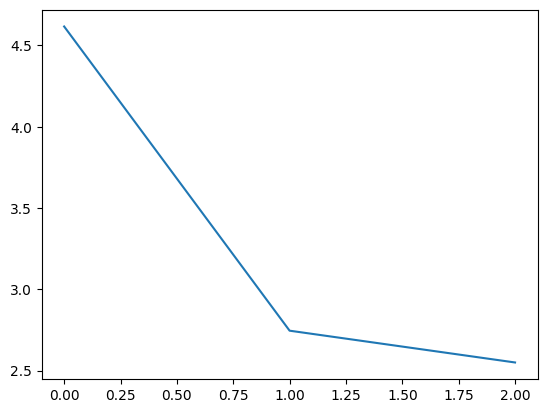

In [ ]:
plt.plot(track)

Сделаем предсказание

In [ ]:
pred = predict(X, weights)

pred[:10]

array([-8.91163955, -8.72421542, -8.53679129, -8.34936715, -8.16194302,
       -7.97451889, -7.78709476, -7.59967062, -7.41224649, -7.22482236])

Добавим к графику полученную регрессионную прямую

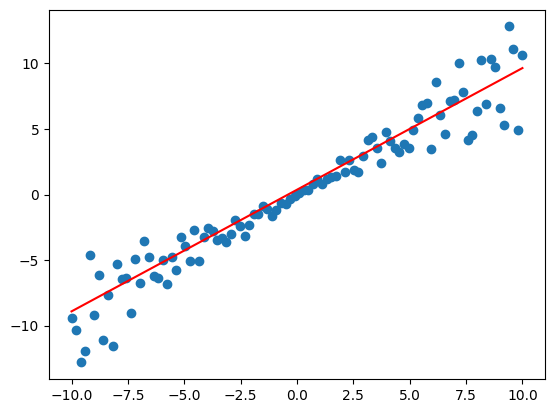

In [ ]:
plt.scatter(X, y)
plt.plot(X, pred, '-', c = 'r')